In [21]:
# import sys
# sys.path.append('..')

# from helper_fun import *
# import helper_fun

# # Silence some expected warnings
# filterwarnings("ignore")

# from Split_functions_regression.split_furthest_cluster import *
# from Split_functions_regression.split_hierarchical_cluster import *
# from Split_functions_regression.split_random import *
# from Split_functions_regression.split_strat_pIC50 import *

# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from sklearn.ensemble import RandomForestRegressor

# import seaborn as sns

# # Neural network specific libraries
# from tensorflow.keras.models import Sequential, load_model
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.callbacks import ModelCheckpoint


# SEED = 42
# seed_everything(SEED)
#import Regression_variables from same directory
from Regression_variables import *
# Set path to this notebook
HERE = Path(_dh[-1])
DATA = HERE / "data"

# compounds = pd.read_csv('../COVID_MOONSHOT/compounds_filtered.csv')


Assign cluster ID


  0%|          | 0/595 [00:00<?, ?it/s][12:27:52] DEPRECATION WARNING: please use MorganGenerator
[12:27:52] DEPRECATION WARNING: please use MorganGenerator
[12:27:52] DEPRECATION WARNING: please use MorganGenerator
[12:27:52] DEPRECATION WARNING: please use MorganGenerator
[12:27:52] DEPRECATION WARNING: please use MorganGenerator
[12:27:52] DEPRECATION WARNING: please use MorganGenerator
[12:27:52] DEPRECATION WARNING: please use MorganGenerator
[12:27:52] DEPRECATION WARNING: please use MorganGenerator
[12:27:52] DEPRECATION WARNING: please use MorganGenerator
[12:27:52] DEPRECATION WARNING: please use MorganGenerator
[12:27:52] DEPRECATION WARNING: please use MorganGenerator
[12:27:52] DEPRECATION WARNING: please use MorganGenerator
[12:27:52] DEPRECATION WARNING: please use MorganGenerator
[12:27:52] DEPRECATION WARNING: please use MorganGenerator
[12:27:52] DEPRECATION WARNING: please use MorganGenerator
[12:27:52] DEPRECATION WARNING: please use MorganGenerator
[12:27:52] DEPREC

In [2]:
# compounds["Fingerprints"] = compounds["SMILES"].apply(smiles_to_fp)
# x_train_rand, x_test_rand, y_train_rand, y_test_rand = random_split(compounds["Fingerprints"], compounds["f_avg_pIC50"])
# x_train_strat, x_test_strat, y_train_strat, y_test_strat = strat_pIC50_split(compounds)
# x_train_hi, x_test_hi, y_train_hi, y_test_hi = split_hierarchical_clusters(compounds, test_size=0.2, random_state=42)
# x_train_noise, x_test_noise, y_train_noise, y_test_noise = UMAP_noise_split(compounds)
# x_train_fur, x_test_fur, y_train_fur, y_test_fur = furthest_cluster_split(compounds)
# print(f"Shape of train_x: {train_x.shape}") (476,)
# print(f"Shape of test_x: {test_y.shape}") (119,)


Assign cluster ID


  0%|          | 0/595 [00:00<?, ?it/s][10:31:00] DEPRECATION WARNING: please use MorganGenerator
[10:31:00] DEPRECATION WARNING: please use MorganGenerator
[10:31:00] DEPRECATION WARNING: please use MorganGenerator
[10:31:00] DEPRECATION WARNING: please use MorganGenerator
[10:31:00] DEPRECATION WARNING: please use MorganGenerator
[10:31:00] DEPRECATION WARNING: please use MorganGenerator
[10:31:00] DEPRECATION WARNING: please use MorganGenerator
[10:31:00] DEPRECATION WARNING: please use MorganGenerator
[10:31:00] DEPRECATION WARNING: please use MorganGenerator
[10:31:00] DEPRECATION WARNING: please use MorganGenerator
[10:31:00] DEPRECATION WARNING: please use MorganGenerator
[10:31:00] DEPRECATION WARNING: please use MorganGenerator
[10:31:00] DEPRECATION WARNING: please use MorganGenerator
[10:31:00] DEPRECATION WARNING: please use MorganGenerator
[10:31:00] DEPRECATION WARNING: please use MorganGenerator
[10:31:00] DEPRECATION WARNING: please use MorganGenerator
[10:31:00] DEPREC

In [22]:
rfr_rand = RandomForestRegressor(random_state=SEED)
rfr_strat = RandomForestRegressor(random_state=SEED)
rfr_hi = RandomForestRegressor(random_state=SEED)
rfr_noise = RandomForestRegressor(random_state=SEED)
rfr_fur = RandomForestRegressor(random_state=SEED)
rfr_rand.fit(np.array(list((x_train_rand))).astype(float), y_train_rand)
rfr_strat.fit(np.array(list((x_train_strat))).astype(float), y_train_strat)
rfr_hi.fit(np.array(list((x_train_hi))).astype(float), y_train_hi)
rfr_noise.fit(np.array(list((x_train_noise))).astype(float), y_train_noise)
rfr_fur.fit(np.array(list((x_train_fur))).astype(float), y_train_fur)

RandomForestRegressor(random_state=42)

In [23]:
y_pred_rfr_rand = rfr_rand.predict(np.array(list((x_test_rand))).astype(float))
y_pred_rfr_strat = rfr_strat.predict(np.array(list((x_test_strat))).astype(float))
y_pred_rfr_hi = rfr_hi.predict(np.array(list((x_test_hi))).astype(float))
y_pred_rfr_noise = rfr_noise.predict(np.array(list((x_test_noise))).astype(float))
y_pred_rfr_fur = rfr_fur.predict(np.array(list((x_test_fur))).astype(float))

In [24]:
mae_rfr_rand = mean_absolute_error(y_test_rand, y_pred_rfr_rand)
mse_rfr_rand = mean_squared_error(y_test_rand, y_pred_rfr_rand)
r2_rfr_rand = r2_score(y_test_rand, y_pred_rfr_rand)

mae_rfr_strat = mean_absolute_error(y_test_strat, y_pred_rfr_strat)
mse_rfr_strat = mean_squared_error(y_test_strat, y_pred_rfr_strat)
r2_rfr_strat = r2_score(y_test_strat, y_pred_rfr_strat)

mae_rfr_hi = mean_absolute_error(y_test_hi, y_pred_rfr_hi)
mse_rfr_hi = mean_squared_error(y_test_hi, y_pred_rfr_hi)
r2_rfr_hi = r2_score(y_test_hi, y_pred_rfr_hi)

mae_rfr_noise = mean_absolute_error(y_test_noise, y_pred_rfr_noise)
mse_rfr_noise = mean_squared_error(y_test_noise, y_pred_rfr_noise)
r2_rfr_noise = r2_score(y_test_noise, y_pred_rfr_noise)

mae_rfr_fur = mean_absolute_error(y_test_fur, y_pred_rfr_fur)
mse_rfr_fur = mean_squared_error(y_test_fur, y_pred_rfr_fur)
r2_rfr_fur = r2_score(y_test_fur, y_pred_rfr_fur)

In [6]:
#Creat a table that shows the performance of the random forest regressor on the different splits displaying mae, mse and r2 values
split_scores_rfr_initial = {'Split': ['Random', 'Stratified pIC50', 'Hierarchical Clustering', 'UMAP Noise', 'UMAP Furthest Cluster'],
        'MAE': [mae_rfr_rand, mae_rfr_strat, mae_rfr_hi, mae_rfr_noise, mae_rfr_fur],
        'MSE': [mse_rfr_rand, mse_rfr_strat, mse_rfr_hi, mse_rfr_noise, mse_rfr_fur],
        'R2': [r2_rfr_rand, r2_rfr_strat, r2_rfr_hi, r2_rfr_noise, r2_rfr_fur]}

split_scores_rfr_initial_df = pd.DataFrame(split_scores_rfr_initial)
split_scores_rfr_initial_df.set_index("Split", inplace=True)
#save df to csv in data file
split_scores_rfr_initial_df.to_csv(DATA / "split_scores_rfr_initial.csv")

print(split_scores_rfr_initial_df)

                              MAE       MSE        R2
Split                                                
Random                   0.382970  0.309122  0.579999
Stratified pIC50         0.461976  0.423172  0.516725
Hierarchical Clustering  0.674829  0.705286  0.323519
UMAP Noise               0.783802  0.828038 -0.040280
UMAP Furthest Cluster    0.839491  0.938845 -0.237629


# Optuna

In [7]:
def objective(trial, X_train, y_train):
    n_estimators = trial.suggest_int("n_estimators", 50, 1000)
    max_depth = trial.suggest_int("max_depth", 1, 64 )
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 5)

    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

    score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1).mean()
    return score

In [8]:
study_rand = optuna.create_study(direction="maximize", sampler=optuna.samplers.RandomSampler(seed=SEED))
# study_strat = optuna.create_study(direction="maximize", sampler=optuna.samplers.RandomSampler(seed=SEED))
# study_hi = optuna.create_study(direction="maximize", sampler=optuna.samplers.RandomSampler(seed=SEED))
# study_noise = optuna.create_study(direction="maximize", sampler=optuna.samplers.RandomSampler(seed=SEED))
# study_fur = optuna.create_study(direction="maximize", sampler=optuna.samplers.RandomSampler(seed=SEED))

#set the sampler of this study to genetic aglorithm
study_rand_TPE = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=SEED))


[I 2024-07-31 10:31:45,462] A new study created in memory with name: no-name-14f3fbcf-e47e-4fe5-b6dd-65deacec73f2
[I 2024-07-31 10:31:45,470] A new study created in memory with name: no-name-59ff71e4-8e12-4149-85cb-b44216a4f85d


In [9]:
#add trials using study.optimize
study_rand.optimize(lambda trial: objective(trial, np.array(list((x_train_rand))).astype(float), y_train_rand), n_trials=1000, show_progress_bar=True)

  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2024-07-31 10:31:59,564] Trial 0 finished with value: -0.44196764527812943 and parameters: {'n_estimators': 406, 'max_depth': 61, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 0 with value: -0.44196764527812943.
[I 2024-07-31 10:32:02,973] Trial 1 finished with value: -0.4719571313770842 and parameters: {'n_estimators': 198, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 0 with value: -0.44196764527812943.
[I 2024-07-31 10:32:08,110] Trial 2 finished with value: -0.4710034557092433 and parameters: {'n_estimators': 621, 'max_depth': 46, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 0 with value: -0.44196764527812943.
[I 2024-07-31 10:32:14,046] Trial 3 finished with value: -0.41426525261565034 and parameters: {'n_estimators': 841, 'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 3 with value: -0.41426525261565034.
[I 2024-07-31 10:32:16,218] Trial 4 finished with value: -0.42639267682858845 

In [10]:
#add trials using study.optimize
study_rand_TPE.optimize(lambda trial: objective(trial, np.array(list((x_train_rand))).astype(float), y_train_rand), n_trials=1000, show_progress_bar=True)

  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2024-07-31 11:19:44,727] Trial 0 finished with value: -0.44348363363203197 and parameters: {'n_estimators': 406, 'max_depth': 61, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 0 with value: -0.44348363363203197.
[I 2024-07-31 11:19:45,920] Trial 1 finished with value: -0.47612453927099124 and parameters: {'n_estimators': 198, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 0 with value: -0.44348363363203197.
[I 2024-07-31 11:19:48,932] Trial 2 finished with value: -0.4707836419334394 and parameters: {'n_estimators': 621, 'max_depth': 46, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 0 with value: -0.44348363363203197.
[I 2024-07-31 11:19:54,554] Trial 3 finished with value: -0.41107367443679876 and parameters: {'n_estimators': 841, 'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 3 with value: -0.41107367443679876.
[I 2024-07-31 11:19:57,051] Trial 4 finished with value: -0.4235308181848002 

In [10]:
# # Call the optimize function
# study_rand_TPE.optimize(lambda trial: objective(trial, np.array(list((x_train_rand))).astype(float), y_train_rand), n_trials=500, show_progress_bar=True)

# # study_rand_gene.optimize(lambda trial: objective_gene(trial, np.array(list((x_train_rand))).astype(float), y_train_rand, np.array(list((x_test_rand))).astype(float), y_test_rand), n_trials=1000, show_progress_bar=True)

In [11]:

# study_strat.optimize(lambda trial: objective(trial, np.array(list((x_train_strat))).astype(float), y_train_strat), n_trials=200, show_progress_bar=True)


In [12]:
# study_hi.optimize(lambda trial: objective(trial, np.array(list((x_train_hi))).astype(float), y_train_hi), n_trials=200, show_progress_bar=True)


In [13]:
# study_noise.optimize(lambda trial: objective(trial, np.array(list((x_train_noise))).astype(float), y_train_noise), n_trials=200, show_progress_bar=True)


In [14]:
# study_fur.optimize(lambda trial: objective(trial, np.array(list((x_train_fur))).astype(float), y_train_fur), n_trials=200, show_progress_bar=True)

In [11]:
best_params_rand = study_rand.best_params
# best_params_strat = study_strat.best_params
# best_params_hi = study_hi.best_params
# best_params_noise = study_noise.best_params
# best_params_fur = study_fur.best_params


In [12]:
best_params_rand_TPE = study_rand_TPE.best_params

In [13]:
best_n_estimators_rand = best_params_rand["n_estimators"]
best_max_depth_rand = best_params_rand["max_depth"]
best_min_samples_split_rand = best_params_rand["min_samples_split"]
best_min_samples_leaf_rand = best_params_rand["min_samples_leaf"]

best_n_estimators_rand_TPE = best_params_rand_TPE["n_estimators"]
best_max_depth_rand_TPE = best_params_rand_TPE["max_depth"]
best_min_samples_split_rand_TPE = best_params_rand_TPE["min_samples_split"]
best_min_samples_leaf_rand_TPE = best_params_rand_TPE["min_samples_leaf"]


# best_n_estimators_strat = best_params_strat["n_estimators"]
# best_max_depth_strat = best_params_strat["max_depth"]
# best_min_samples_split_strat = best_params_strat["min_samples_split"]
# best_min_samples_leaf_strat = best_params_strat["min_samples_leaf"]

# best_n_estimators_hi = best_params_hi["n_estimators"]
# best_max_depth_hi = best_params_hi["max_depth"]
# best_min_samples_split_hi = best_params_hi["min_samples_split"]
# best_min_samples_leaf_hi = best_params_hi["min_samples_leaf"]

# best_n_estimators_noise = best_params_noise["n_estimators"]
# best_max_depth_noise = best_params_noise["max_depth"]
# best_min_samples_split_noise = best_params_noise["min_samples_split"]
# best_min_samples_leaf_noise = best_params_noise["min_samples_leaf"]

# best_n_estimators_fur = best_params_fur["n_estimators"]
# best_max_depth_fur = best_params_fur["max_depth"]
# best_min_samples_split_fur = best_params_fur["min_samples_split"]
# best_min_samples_leaf_fur = best_params_fur["min_samples_leaf"]

In [14]:

rfr_rand_best = RandomForestRegressor(random_state=SEED, n_estimators=best_n_estimators_rand, max_depth=best_max_depth_rand, min_samples_split=best_min_samples_split_rand, min_samples_leaf=best_min_samples_leaf_rand)
rfr_rand_best_TPE = RandomForestRegressor(random_state=SEED, n_estimators=best_n_estimators_rand_TPE, max_depth=best_max_depth_rand_TPE, min_samples_split=best_min_samples_split_rand_TPE, min_samples_leaf=best_min_samples_leaf_rand_TPE)

# rfr_strat_best = RandomForestRegressor(random_state=SEED, n_estimators=best_n_estimators_strat, max_depth=best_max_depth_strat, min_samples_split=best_min_samples_split_strat, min_samples_leaf=best_min_samples_leaf_strat)
# rfr_hi_best = RandomForestRegressor(random_state=SEED, n_estimators=best_n_estimators_hi, max_depth=best_max_depth_hi, min_samples_split=best_min_samples_split_hi, min_samples_leaf=best_min_samples_leaf_hi)
# rfr_noise_best = RandomForestRegressor(random_state=SEED, n_estimators=best_n_estimators_noise, max_depth=best_max_depth_noise, min_samples_split=best_min_samples_split_noise, min_samples_leaf=best_min_samples_leaf_noise)
# rfr_fur_best = RandomForestRegressor(random_state=SEED, n_estimators=best_n_estimators_fur, max_depth=best_max_depth_fur, min_samples_split=best_min_samples_split_fur, min_samples_leaf=best_min_samples_leaf_fur)

rfr_rand_best.fit(np.array(list((x_train_rand))).astype(float), y_train_rand)
rfr_rand_best_TPE.fit(np.array(list((x_train_rand))).astype(float), y_train_rand)

# rfr_strat_best.fit(np.array(list((x_train_strat))).astype(float), y_train_strat)
# rfr_hi_best.fit(np.array(list((x_train_hi))).astype(float), y_train_hi)
# rfr_noise_best.fit(np.array(list((x_train_noise))).astype(float), y_train_noise)
# rfr_fur_best.fit(np.array(list((x_train_fur))).astype(float), y_train_fur)

y_pred_rfr_rand_best = rfr_rand_best.predict(np.array(list((x_test_rand))).astype(float))
y_pred_rfr_rand_best_TPE = rfr_rand_best_TPE.predict(np.array(list((x_test_rand))).astype(float))
# y_pred_rfr_strat_best = rfr_strat_best.predict(np.array(list((x_test_strat))).astype(float))
# y_pred_rfr_hi_best = rfr_hi_best.predict(np.array(list((x_test_hi))).astype(float))
# y_pred_rfr_noise_best = rfr_noise_best.predict(np.array(list((x_test_noise))).astype(float))
# y_pred_rfr_fur_best = rfr_fur_best.predict(np.array(list((x_test_fur))).astype(float))

In [15]:
                                          
mae_rfr_rand_best = mean_absolute_error(y_test_rand, y_pred_rfr_rand_best)
mae_rfr_rand_best_TPE = mean_absolute_error(y_test_rand, y_pred_rfr_rand_best_TPE)
# mae_rfr_strat_best = mean_absolute_error(y_test_strat, y_pred_rfr_strat_best)
# mae_rfr_hi_best = mean_absolute_error(y_test_hi, y_pred_rfr_hi_best)
# mae_rfr_noise_best = mean_absolute_error(y_test_noise, y_pred_rfr_noise_best)
# mae_rfr_fur_best = mean_absolute_error(y_test_fur, y_pred_rfr_fur_best)

mse_rfr_rand_best = mean_squared_error(y_test_rand, y_pred_rfr_rand_best)
mse_rfr_rand_best_TPE = mean_squared_error(y_test_rand, y_pred_rfr_rand_best_TPE)
# mse_rfr_strat_best = mean_squared_error(y_test_strat, y_pred_rfr_strat_best)
# mse_rfr_hi_best = mean_squared_error(y_test_hi, y_pred_rfr_hi_best)
# mse_rfr_noise_best = mean_squared_error(y_test_noise, y_pred_rfr_noise_best)
# mse_rfr_fur_best = mean_squared_error(y_test_fur, y_pred_rfr_fur_best)

r2_rfr_rand_best = r2_score(y_test_rand, y_pred_rfr_rand_best)
r2_rfr_rand_best_TPE = r2_score(y_test_rand, y_pred_rfr_rand_best_TPE)
# r2_rfr_strat_best = r2_score(y_test_strat, y_pred_rfr_strat_best)
# r2_rfr_hi_best = r2_score(y_test_hi, y_pred_rfr_hi_best)
# r2_rfr_noise_best = r2_score(y_test_noise, y_pred_rfr_noise_best)
# r2_rfr_fur_best = r2_score(y_test_fur, y_pred_rfr_fur_best)

# split_scores_rfr_best = {'Split': ['Random', 'Random Optimized', 'Stratified pIC50', 'Stratified pIC50 Optimized', 'Hierarchical Clustering', 'Hierarchical Clustering Optimized', 'UMAP Noise', 'UMAP Noise Optimized', 'UMAP Furthest Cluster', 'UMAP Furthest Cluster Optimized'],
#         'MAE': [mae_rfr_rand, mae_rfr_rand_best, mae_rfr_strat, mae_rfr_strat_best, mae_rfr_hi, mae_rfr_hi_best, mae_rfr_noise, mae_rfr_noise_best, mae_rfr_fur, mae_rfr_fur_best],
#         'MSE': [mse_rfr_rand, mse_rfr_rand_best, mse_rfr_strat, mse_rfr_strat_best, mse_rfr_hi, mse_rfr_hi_best, mse_rfr_noise, mse_rfr_noise_best, mse_rfr_fur, mse_rfr_fur_best],
#         'R2': [r2_rfr_rand, r2_rfr_rand_best, r2_rfr_strat, r2_rfr_strat_best, r2_rfr_hi, r2_rfr_hi_best, r2_rfr_noise, r2_rfr_noise_best, r2_rfr_fur, r2_rfr_fur_best]}

split_scores_rfr_best = {'Split': ['Random', 'Random Optimized: Random Sampler', 'Random Optimized: TPE', 'Stratified pIC50','Hierarchical Clustering', 'UMAP Noise', 'UMAP Furthest Cluster'],
        'MAE': [mae_rfr_rand, mae_rfr_rand_best, mae_rfr_rand_best_TPE, mae_rfr_strat, mae_rfr_hi, mae_rfr_noise, mae_rfr_fur],
        'MSE': [mse_rfr_rand, mse_rfr_rand_best,  mse_rfr_rand_best_TPE, mse_rfr_strat, mse_rfr_hi, mse_rfr_noise, mse_rfr_fur],
        'R2': [r2_rfr_rand, r2_rfr_rand_best, r2_rfr_rand_best_TPE, r2_rfr_strat, r2_rfr_hi, r2_rfr_noise, r2_rfr_fur]}

split_scores_rfr_best_df = pd.DataFrame(split_scores_rfr_best)
print(split_scores_rfr_best_df)

                              Split       MAE       MSE        R2
0                            Random  0.382970  0.309122  0.579999
1  Random Optimized: Random Sampler  0.379481  0.301602  0.590216
2             Random Optimized: TPE  0.375239  0.301341  0.590571
3                  Stratified pIC50  0.461976  0.423172  0.516725
4           Hierarchical Clustering  0.674829  0.705286  0.323519
5                        UMAP Noise  0.783802  0.828038 -0.040280
6             UMAP Furthest Cluster  0.839491  0.938845 -0.237629


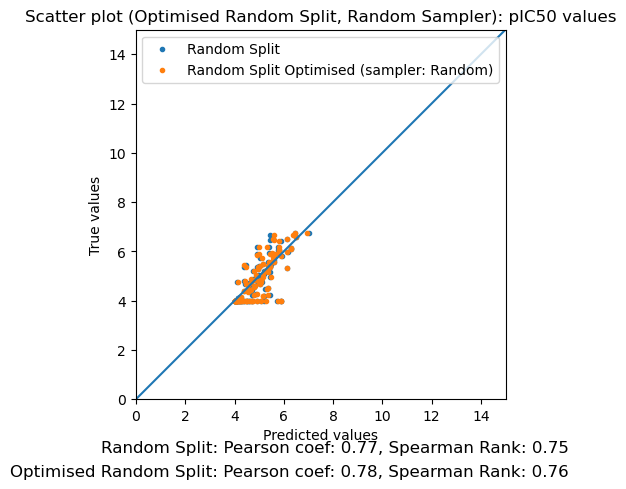

In [16]:
# Scatter plot
limits = 0, 15
fig, ax = plt.subplots()
ax.scatter(y_pred_rfr_rand, y_test_rand, marker=".", label="Random Split")
ax.scatter(y_pred_rfr_rand_best, y_test_rand, marker=".", label="Random Split Optimised (sampler: Random)")
lin = np.linspace(*limits, 100)
ax.plot(lin, lin)
ax.set_aspect("equal", adjustable="box")
ax.set_xlabel("Predicted values")
ax.set_ylabel("True values")
ax.set_title("Scatter plot (Optimised Random Split, Random Sampler): pIC50 values")
ax.set_xlim(limits)
ax.set_ylim(limits)

pearsoncoef_rfr_rand = np.corrcoef(y_pred_rfr_rand.flatten(), y_test_rand.values.flatten())[0,1]
spearmancoef_rfr_rand= spearmanr(y_pred_rfr_rand.flatten(), y_test_rand.values.flatten()).correlation
pearsoncoef_rfr_rand_best = np.corrcoef(y_pred_rfr_rand_best.flatten(), y_test_rand.values.flatten())[0,1]
spearmancoef_rfr_rand_best = spearmanr(y_pred_rfr_rand_best.flatten(), y_test_rand.values.flatten()).correlation

fig.text(0.9, 0, f"Random Split: Pearson coef: {pearsoncoef_rfr_rand:.2f}, Spearman Rank: {spearmancoef_rfr_rand:.2f}", horizontalalignment='right', fontsize=12)
fig.text(0.9, -0.05, f"Optimised Random Split: Pearson coef: {pearsoncoef_rfr_rand_best:.2f}, Spearman Rank: {spearmancoef_rfr_rand_best:.2f}", horizontalalignment='right', fontsize=12)

ax.legend()
plt.show();

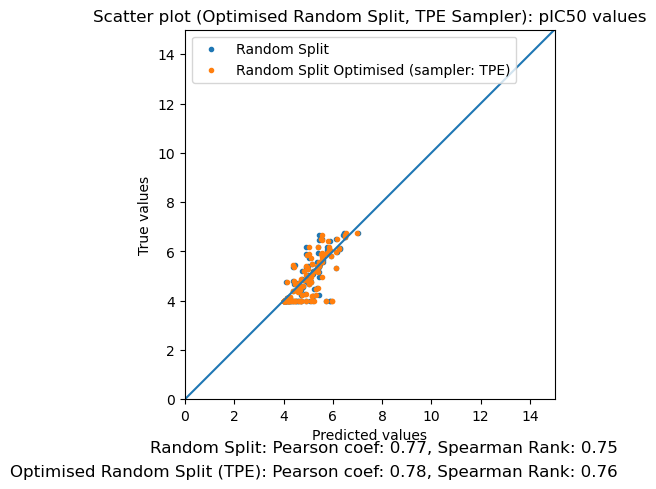

In [17]:
# Scatter plot
limits = 0, 15
fig, ax = plt.subplots()
ax.scatter(y_pred_rfr_rand, y_test_rand, marker=".", label="Random Split")
ax.scatter(y_pred_rfr_rand_best_TPE, y_test_rand, marker=".", label="Random Split Optimised (sampler: TPE)")
lin = np.linspace(*limits, 100)
ax.plot(lin, lin)
ax.set_aspect("equal", adjustable="box")
ax.set_xlabel("Predicted values")
ax.set_ylabel("True values")
ax.set_title("Scatter plot (Optimised Random Split, TPE Sampler): pIC50 values")
ax.set_xlim(limits)
ax.set_ylim(limits)

pearsoncoef_rfr_rand_best_TPE= np.corrcoef(y_pred_rfr_rand_best_TPE.flatten(), y_test_rand.values.flatten())[0,1]
spearmancoef_rfr_rand_best_TPE = spearmanr(y_pred_rfr_rand_best_TPE.flatten(), y_test_rand.values.flatten()).correlation
pearsoncoef_rfr_rand = np.corrcoef(y_pred_rfr_rand.flatten(), y_test_rand.values.flatten())[0,1]
spearmancoef_rfr_rand = spearmanr(y_pred_rfr_rand.flatten(), y_test_rand.values.flatten()).correlation
fig.text(0.9, 0, f"Random Split: Pearson coef: {pearsoncoef_rfr_rand:.2f}, Spearman Rank: {spearmancoef_rfr_rand:.2f}", horizontalalignment='right', fontsize=12)
fig.text(0.9, -0.05, f"Optimised Random Split (TPE): Pearson coef: {pearsoncoef_rfr_rand_best_TPE:.2f}, Spearman Rank: {spearmancoef_rfr_rand_best_TPE:.2f}", horizontalalignment='right', fontsize=12)
ax.legend()
plt.show();

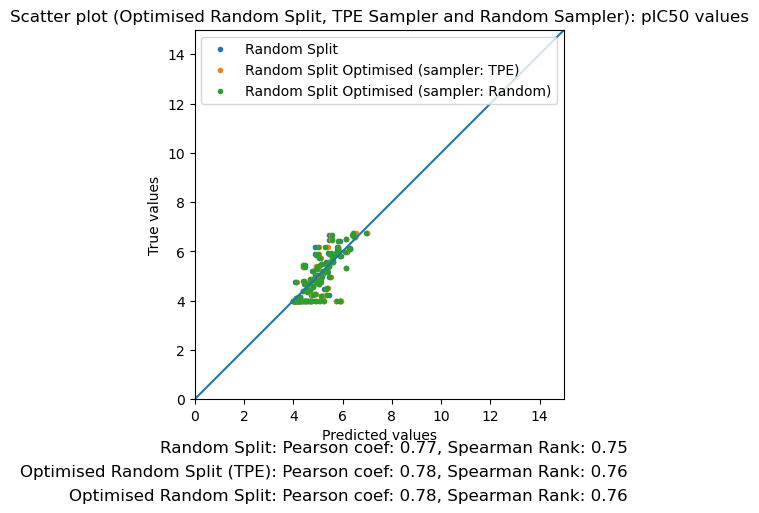

In [18]:
# Scatter plot
limits = 0, 15
fig, ax = plt.subplots()
ax.scatter(y_pred_rfr_rand, y_test_rand, marker=".", label="Random Split")
ax.scatter(y_pred_rfr_rand_best_TPE, y_test_rand, marker=".", label="Random Split Optimised (sampler: TPE)")
ax.scatter(y_pred_rfr_rand_best, y_test_rand, marker=".", label="Random Split Optimised (sampler: Random)")
lin = np.linspace(*limits, 100)
ax.plot(lin, lin)
ax.set_aspect("equal", adjustable="box")
ax.set_xlabel("Predicted values")
ax.set_ylabel("True values")
ax.set_title("Scatter plot (Optimised Random Split, TPE Sampler and Random Sampler): pIC50 values")
ax.set_xlim(limits)
ax.set_ylim(limits)


pearsoncoef_rfr_rand_best_TPE= np.corrcoef(y_pred_rfr_rand_best_TPE.flatten(), y_test_rand.values.flatten())[0,1]
spearmancoef_rfr_rand_best_TPE = spearmanr(y_pred_rfr_rand_best_TPE.flatten(), y_test_rand.values.flatten()).correlation
pearsoncoef_rfr_rand = np.corrcoef(y_pred_rfr_rand.flatten(), y_test_rand.values.flatten())[0,1]
spearmancoef_rfr_rand = spearmanr(y_pred_rfr_rand.flatten(), y_test_rand.values.flatten()).correlation
pearsoncoef_rfr_rand_best = np.corrcoef(y_pred_rfr_rand_best.flatten(), y_test_rand.values.flatten())[0,1]
spearmancoef_rfr_rand_best = spearmanr(y_pred_rfr_rand_best.flatten(), y_test_rand.values.flatten()).correlation

fig.text(0.9, 0, f"Random Split: Pearson coef: {pearsoncoef_rfr_rand:.2f}, Spearman Rank: {spearmancoef_rfr_rand:.2f}", horizontalalignment='right', fontsize=12)
fig.text(0.9, -0.05, f"Optimised Random Split (TPE): Pearson coef: {pearsoncoef_rfr_rand_best_TPE:.2f}, Spearman Rank: {spearmancoef_rfr_rand_best_TPE:.2f}", horizontalalignment='right', fontsize=12)
fig.text(0.9, -0.10, f"Optimised Random Split: Pearson coef: {pearsoncoef_rfr_rand_best:.2f}, Spearman Rank: {spearmancoef_rfr_rand_best:.2f}", horizontalalignment='right', fontsize=12)
ax.legend()
plt.show();

In [ ]:
optuna.visualization.plot_optimization_history(study_rand)

### Dark lines are parameters that work better

In [ ]:
optuna.visualization.plot_parallel_coordinate(study_rand)

In [ ]:
optuna.visualization.plot_slice(study_rand, params=["n_estimators", "max_depth", "min_samples_split", "min_samples_leaf"])

In [ ]:
optuna.visualization.plot_param_importances(study_rand)

In [19]:
study_rand.best_params

{'n_estimators': 268,
 'max_depth': 31,
 'min_samples_split': 4,
 'min_samples_leaf': 1}

In [20]:
study_rand_TPE.best_params

{'n_estimators': 437,
 'max_depth': 14,
 'min_samples_split': 2,
 'min_samples_leaf': 1}